##### Import thư viện

In [ ]:
import os
import glob
from skimage import feature
from skimage import color
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Chạy thử một ví dụ

In [ ]:
dir_train = 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\training_set'

In [ ]:
path_filename = os.path.join(dir_train, 'Heart\\heart (98).jpg')
img = cv2.imread(path_filename)

In [ ]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
height, width = gray.shape[:2]
minSize1 = (int(width // 2), int(height // 2))
minSize2 = (int(width // 2.6), int(height // 2.6))

In [ ]:
faces1 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize1)
faces2 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize2)

In [ ]:
def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  return face1 if size1 > size2 else face2

face = maxFace(faces1, faces2)

for (x, y, w, h) in face:
    face_img = img[y:y + h, x:x + w]

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\2244993576.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\2244993576.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


(-0.5, 127.5, 127.5, -0.5)

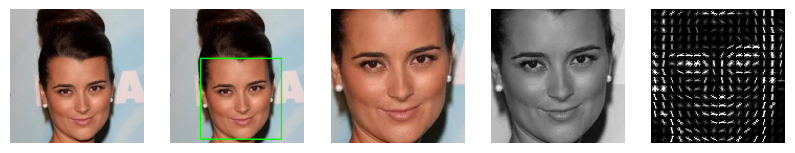

In [ ]:
from skimage import exposure

fig, ax = plt.subplots(1, 5, figsize=(10, 5))

test = img.copy()
for (x, y, w, h) in face:
      cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255,0), 2)
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

faceCropped = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
faceCropped = cv2.resize(faceCropped, (128, 128))
fd, hog_image = feature.hog(faceCropped, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(4, 4), visualize=True, block_norm="L2")
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))


ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].axis('off')

ax[1].imshow(test)
ax[1].axis('off')

ax[2].imshow(face_img)
ax[2].axis('off')

ax[3].imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY), cmap = 'gray')
ax[3].axis('off')

ax[4].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[4].axis('off')

<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\1747925146.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\1747925146.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


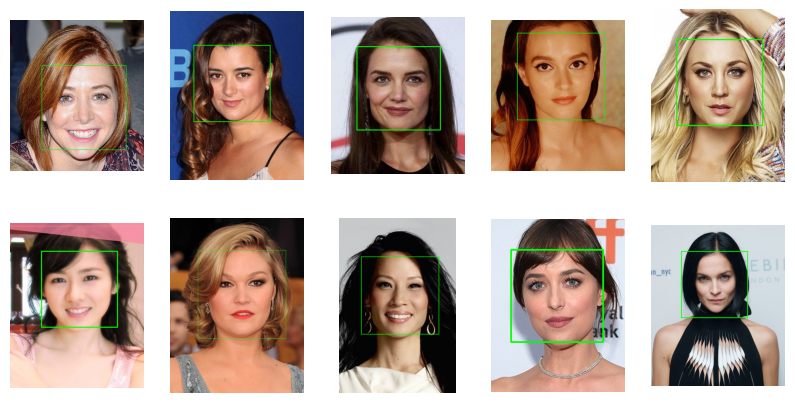

In [ ]:
import random
def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  return face1 if size1 > size2 else face2
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')
imgList = [68, 86, 11, 52, 10, 28, 93, 84, 6, 57]
dir = ["Heart", "Heart", "Square", "Oval", "Oval", "Round", "Round", "Square", "Oval", "Heart"]
count = 0

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for x, y in zip(imgList, dir):
  path_filename = os.path.join(dir_train, f'{y}/{y.lower()} ({x}).jpg')
  img = cv2.imread(path_filename)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  height, width = gray.shape[:2]
  minSize1 = (int(width // 2.6), int(height // 2.6))
  minSize2 = (int(width // 2), int(height // 2))
  face1 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize1)
  face2 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize1)
  faces = maxFace(face1, face2)
  test = img
  for (x, y, w, h) in faces:
      cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255,0), 2)
  test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
  ax[count // 5, count % 5].imshow(test)
  ax[count // 5, count % 5].axis('off')
  count += 1


<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\3111361851.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\3111361851.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


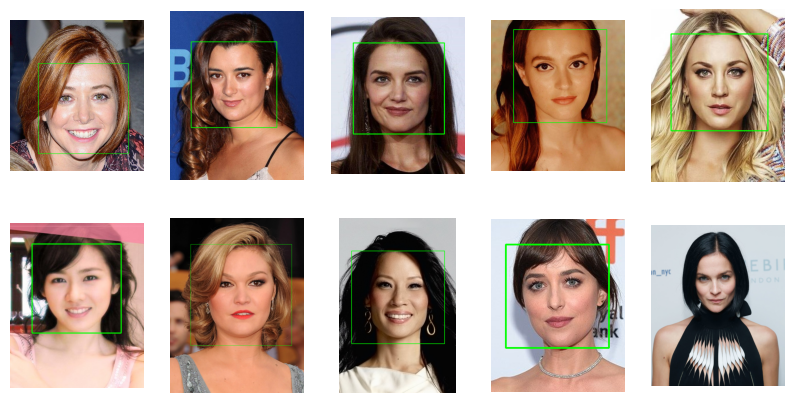

In [ ]:
import random
def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  return face1 if size1 > size2 else face2
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')
imgList = [68, 86, 11, 52, 10, 28, 93, 84, 6, 57]
dir = ["Heart", "Heart", "Square", "Oval", "Oval", "Round", "Round", "Square", "Oval", "Heart"]
count = 0

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for x, y in zip(imgList, dir):
  path_filename = os.path.join(dir_train, f'{y}/{y.lower()} ({x}).jpg')
  img = cv2.imread(path_filename)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  height, width = gray.shape[:2]
  minSize1 = (int(width // 2.6), int(height // 2.6))
  minSize2 = (int(width // 2), int(height // 2))
  face1 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize2)
  face2 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize2)
  faces = maxFace(face1, face2)
  test = img
  for (x, y, w, h) in faces:
      cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255,0), 2)
  test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
  ax[count // 5, count % 5].imshow(test)
  ax[count // 5, count % 5].axis('off')
  count += 1


<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\1607713025.py:4: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\1607713025.py:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


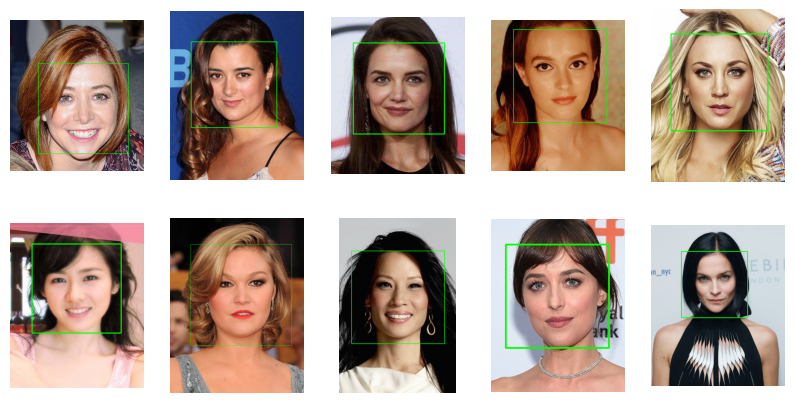

In [ ]:
import random
def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  return face1 if size1 > size2 else face2
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')
imgList = [68, 86, 11, 52, 10, 28, 93, 84, 6, 57]
dir = ["Heart", "Heart", "Square", "Oval", "Oval", "Round", "Round", "Square", "Oval", "Heart"]
count = 0

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for x, y in zip(imgList, dir):
  path_filename = os.path.join(dir_train, f'{y}/{y.lower()} ({x}).jpg')
  img = cv2.imread(path_filename)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  height, width = gray.shape[:2]
  minSize1 = (int(width // 2.6), int(height // 2.6))
  minSize2 = (int(width // 2), int(height // 2))
  face1 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize1)
  face2 = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=minSize2)
  faces = maxFace(face1, face2)
  test = img
  for (x, y, w, h) in faces:
      cv2.rectangle(test, (x, y), (x+w, y+h), (0, 255,0), 2)
  test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
  ax[count // 5, count % 5].imshow(test)
  ax[count // 5, count % 5].axis('off')
  count += 1


##### Thực hiện cắt khuôn mặt và label cho dữ liệu

In [ ]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')

In [ ]:
dir_train = 'C:\\Users\\\Admin\\Documents\\CS231\\FaceShape Dataset\\train_cropped'
dir_test = 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\test_cropped'

In [ ]:
def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  return face1 if size1 > size2 else face2

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\2897726266.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_40572\2897726266.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


In [ ]:

def load_images_labels(path):
    shape_types = ['Heart', 'Oval', 'Round', 'Square']

    for shape in shape_types:
        print(f'Loading {shape} images...')
        files = glob.glob(os.path.join(path, shape, '*.jpg'))
        print(files)
        traindir = os.listdir(path + "\\" + shape)
        for imgName in traindir:
            img_path = os.path.join(path, shape, imgName)
            img = cv2.imread(img_path)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            height, width = img_gray.shape[:2]
            minSize1 = (int(width // 2.6), int(height // 2.6))
            minSize2 = (int(width // 2), int(height // 2))
            face1 = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=6, minSize=minSize1)
            face2 = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=6, minSize=minSize2)
            faces = maxFace(face1, face2)
            for (x, y, w, h) in faces:
                faces = img[y:y + h, x:x + w]
            if len(faces) > 0:
                faces_gray = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
                cv2.imwrite(dir_test + f'\\{shape}' + f'\\{imgName}', faces_gray)


# usage
data_train = load_images_labels('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\training_set')
data_test = load_images_labels('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set')

Loading Heart images...
['C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (101).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (102).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (123).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (13).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (135).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (136).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (137).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (138).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (139).jpg', 'C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\testing_set\\Heart\\heart (140).jpg', 'C:\\Users\\Admin\\Documents\\CS231\

##### GridSearch HOG

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Define the grid for HOG parameters
param_grid = {'orientations': [9],
              'pixels_per_cell': [(8, 8), (16, 16)],
              'cells_per_block': [(2, 2), (4, 4)]}
def Hog(path, orientations, pixels_per_cell, cells_per_block):
    labels = []
    hog_features = []
    shape_types = ['Heart', 'Oval', 'Round', 'Square']

    for shape in shape_types:
        print(f'Loading {shape} images...')
        files = glob.glob(os.path.join(path, shape, '*.jpg'))
        for file in files:
            img = cv2.imread(file)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, (128, 128))
            hog_feature = feature.hog(img_gray, orientations=orientations, pixels_per_cell=pixels_per_cell,
                                      cells_per_block=cells_per_block, block_norm="L2")
            hog_features.append(hog_feature)
            labels.append(shape_types.index(shape))

    labels = np.array(labels).reshape(len(labels), 1)
    hog_features = np.array(hog_features)

    data = np.hstack((hog_features, labels))

    return data

results = []
# Perform Grid Search
for params in ParameterGrid(param_grid):
    print(f"Processing parameters: {params}")
    data_train = Hog('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\train_cropped', **params)
    data_test = Hog('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\test_cropped', **params)

    # Prepare the data
    np.random.shuffle(data_train)
    x_train = data_train[:, :-1]
    y_train = data_train[:, -1]
    np.random.shuffle(data_test)
    x_test = data_test[:, :-1]
    y_test = data_test[:, -1]

    # Train and evaluate a KNN model
    model = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric = 'minkowski' ,p = 2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the result
    results.append((params, accuracy))

# Find the parameters that gave the best result
best_params, best_accuracy = max(results, key=lambda x: x[1])
print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy}")

Processing parameters: {'cells_per_block': (2, 2), 'orientations': 9, 'pixels_per_cell': (8, 8)}
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Processing parameters: {'cells_per_block': (2, 2), 'orientations': 9, 'pixels_per_cell': (16, 16)}
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Processing parameters: {'cells_per_block': (4, 4), 'orientations': 9, 'pixels_per_cell': (8, 8)}
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Processing parameters: {'cells_per_block': (4, 4), 'orientations': 9, 'pixels_per_cell': (16, 16)}
Loading Heart images...
Loading 

##### Test với các size ảnh

In [ ]:
def Hog(path, img_size):
    labels = []
    hog_features = []
    shape_types = ['Heart', 'Oval', 'Round', 'Square']

    for shape in shape_types:
        print(f'Loading {shape} images...')
        files = glob.glob(os.path.join(path, shape, '*.jpg'))
        for file in files:
            img = cv2.imread(file)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, img_size)
            hog_feature = feature.hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(4, 4), block_norm="L2")
            hog_features.append(hog_feature)
            labels.append(shape_types.index(shape))

    labels = np.array(labels).reshape(len(labels), 1)
    hog_features = np.array(hog_features)

    data = np.hstack((hog_features, labels))

    return data

img_sizes = [(64, 64), (128, 128), (256, 256)]
data_train = {}
data_test = {}

for img_size in img_sizes:
    data_train[img_size] = Hog('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\train_cropped', img_size)
    data_test[img_size] = Hog('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\test_cropped', img_size)

for img_size in img_sizes:
    np.random.shuffle(data_train[img_size])
    x_train = data_train[img_size][:, :-1]
    y_train = data_train[img_size][:, -1]
    np.random.shuffle(data_test[img_size])
    x_test = data_test[img_size][:, :-1]
    y_test = data_test[img_size][:, -1]
    model = KNeighborsClassifier(n_neighbors = 6, weights = 'distance', metric = 'minkowski' ,p = 2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy for image size {img_size}: {accuracy_score(y_test, y_pred)}")

Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Accuracy for image size (64, 64): 0.6132561132561133
Accuracy for image size (128, 128): 0.6563706563706564
Accuracy for image size (256, 256): 0.6177606177606177


In [ ]:
def Hog(path):
    labels = []
    hog_features = []
    shape_types = ['Heart', 'Oval', 'Round', 'Square']

    for shape in shape_types:
        print(f'Loading {shape} images...')
        files = glob.glob(os.path.join(path, shape, '*.jpg'))
        for file in files:
            img = cv2.imread(file)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_gray = cv2.resize(img_gray, (128, 128))
            hog_feature = feature.hog(img_gray, orientations=9, pixels_per_cell=(8, 8),
                                      cells_per_block=(4, 4), block_norm="L2")
            hog_features.append(hog_feature)
            labels.append(shape_types.index(shape))

    labels = np.array(labels).reshape(len(labels), 1)
    hog_features = np.array(hog_features)

    data = np.hstack((hog_features, labels))

    return data

In [ ]:
data_train = Hog('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\train_cropped')
data_test = Hog('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\test_cropped')

Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...
Loading Heart images...
Loading Oval images...
Loading Round images...
Loading Square images...


In [ ]:
data_train

array([[4.92260867e-02, 4.73128291e-03, 2.72272340e-03, ...,
        2.76107423e-03, 3.07450916e-02, 0.00000000e+00],
       [2.31827287e-02, 3.62215589e-02, 7.97626371e-02, ...,
        8.76411993e-04, 4.73570867e-02, 0.00000000e+00],
       [3.02359709e-02, 5.14460723e-02, 3.53048316e-03, ...,
        4.76749667e-02, 7.61737632e-02, 0.00000000e+00],
       ...,
       [3.70999769e-02, 6.41856995e-02, 1.31793726e-01, ...,
        9.34697513e-02, 1.35697598e-01, 3.00000000e+00],
       [1.13071819e-02, 0.00000000e+00, 4.20809738e-03, ...,
        1.38228882e-02, 4.58252256e-03, 3.00000000e+00],
       [1.49995584e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.71523036e-02, 2.97348511e-02, 3.00000000e+00]])

In [ ]:
np.random.shuffle(data_train)
x_train = data_train[:, :-1]
y_train = data_train[:, -1]
np.random.shuffle(data_test)
x_test = data_test[:, :-1]
y_test = data_test[:, -1]

##### GridSearch KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['distance', 'uniform']
}

model = KNeighborsClassifier(metric='minkowski', p=2)
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(x_train, y_train)

cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, "mean cross-validation score:", mean_score)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

{'n_neighbors': 1, 'weights': 'distance'} mean cross-validation score: 0.6606078332623095
{'n_neighbors': 1, 'weights': 'uniform'} mean cross-validation score: 0.6606078332623095
{'n_neighbors': 2, 'weights': 'distance'} mean cross-validation score: 0.6606078332623095
{'n_neighbors': 2, 'weights': 'uniform'} mean cross-validation score: 0.6034040987099524
{'n_neighbors': 3, 'weights': 'distance'} mean cross-validation score: 0.6588411523909141
{'n_neighbors': 3, 'weights': 'uniform'} mean cross-validation score: 0.6308841798060408
{'n_neighbors': 4, 'weights': 'distance'} mean cross-validation score: 0.6577173000684409
{'n_neighbors': 4, 'weights': 'uniform'} mean cross-validation score: 0.6268657911388319
{'n_neighbors': 5, 'weights': 'distance'} mean cross-validation score: 0.6588412815248131
{'n_neighbors': 5, 'weights': 'uniform'} mean cross-validation score: 0.6308797892534769
{'n_neighbors': 6, 'weights': 'distance'} mean cross-validation score: 0.6618950399669418
{'n_neighbors':

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[286  44  17  32]
 [ 92 209  41  46]
 [ 36  72 219  63]
 [ 25  36  30 306]]


0.6563706563706564

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70       379
         1.0       0.58      0.54      0.56       388
         2.0       0.71      0.56      0.63       390
         3.0       0.68      0.77      0.73       397

    accuracy                           0.66      1554
   macro avg       0.66      0.66      0.65      1554
weighted avg       0.66      0.66      0.65      1554



##### GridSearch SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

para = {
    'C': [1, 2, 5],
    'gamma': ["scale"]
}
model = SVC(kernel = 'rbf', random_state = 42)
search = GridSearchCV(model, para)
search.fit(x_train[:500], y_train[:500])

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1, 2, 5], 'gamma': ['scale']})

In [ ]:
best_params = search.best_params_
best_score = search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

Best parameters: {'C': 5, 'gamma': 'scale'}
Best cross-validation score: 0.5479999999999999


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf', C = 5, gamma="scale")
model.fit(x_train, y_train)

SVC(C=5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[292  36  35  16]
 [ 61 259  47  21]
 [ 20  47 295  28]
 [ 19  19  41 318]]


0.749034749034749

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       379
         1.0       0.72      0.67      0.69       388
         2.0       0.71      0.76      0.73       390
         3.0       0.83      0.80      0.82       397

    accuracy                           0.75      1554
   macro avg       0.75      0.75      0.75      1554
weighted avg       0.75      0.75      0.75      1554



##### Test mặt

In [ ]:
cap = cv2.VideoCapture(0)
count = 0
image = []

while cap.isOpened() and count < 10:
    ret, frame = cap.read()

    frame = frame[120:120+400,200:200+400, :]
    cv2.imshow('Image Collection', frame)
    image.append(frame)
    count += 1


    if cv2.waitKey(100) & 0XFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')

In [ ]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

new_img = []
for img in image:
    frame = increase_brightness(frame, value=30)
    new_img.append(frame)

In [ ]:
image = new_img

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_13868\50607631.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_13868\50607631.py:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


[[ 37  88 198 198]] [[ 24  74 229 229]]
17710 31775
[[ 37  89 198 198]] [[ 23  75 231 231]]
17549 32448
[[ 38  88 197 197]] [[ 23  75 228 228]]
17331 31365
[[ 38  88 197 197]] [[ 21  75 231 231]]
17331 32760
[[ 39  87 195 195]] [[ 24  73 229 229]]
16848 31980
[[ 40  88 196 196]] [[ 26  75 229 229]]
16848 31262
[[ 40  89 195 195]] [[ 25  75 229 229]]
16430 31416
[[ 41  88 197 197]] [[ 26  75 230 230]]
17004 31620
[[ 40  89 195 195]] [[ 22  74 231 231]]
16430 32813
[[ 40  89 196 196]] [[ 26  76 228 228]]
16692 30704


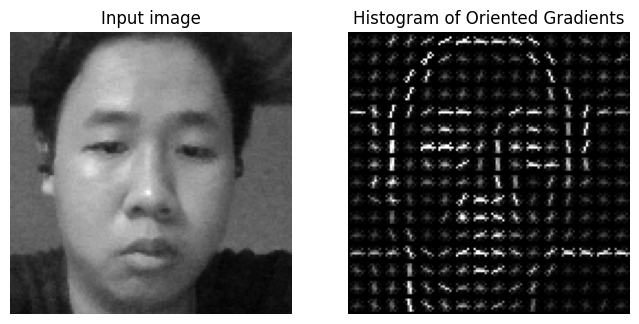

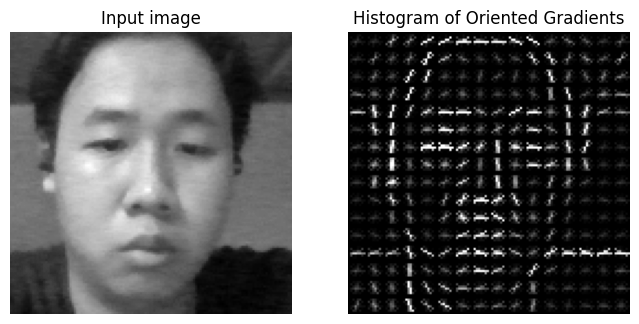

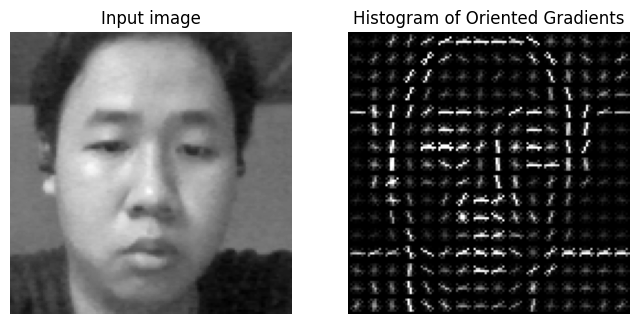

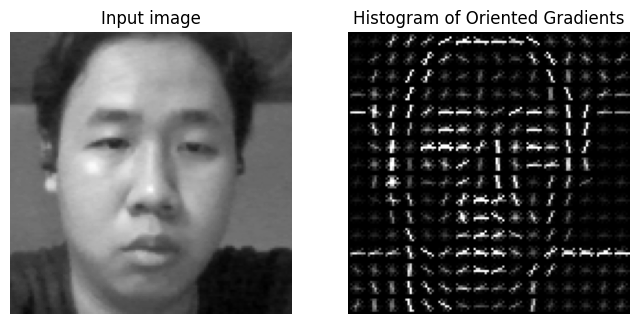

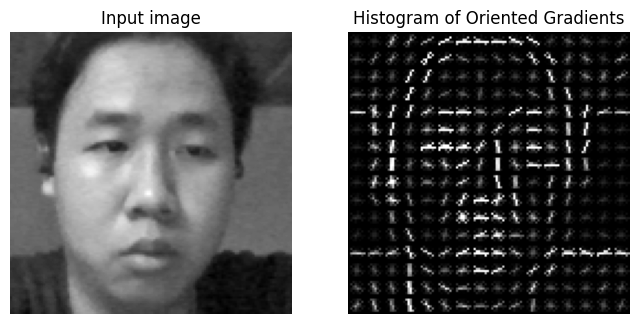

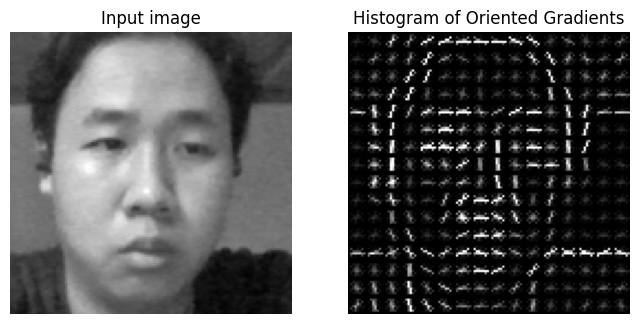

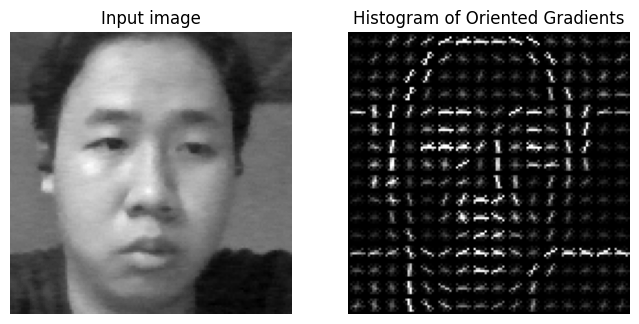

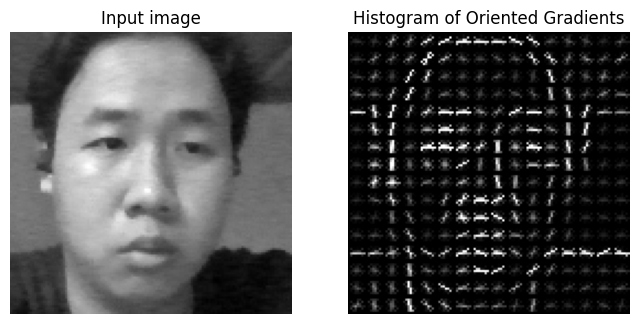

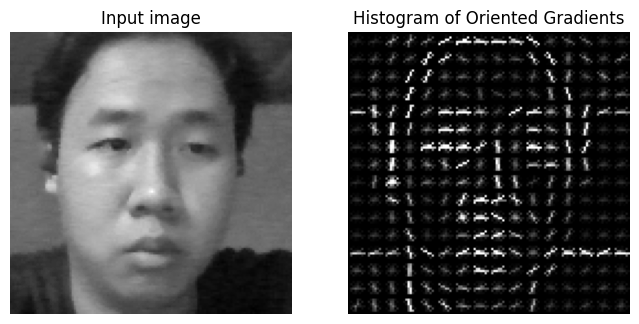

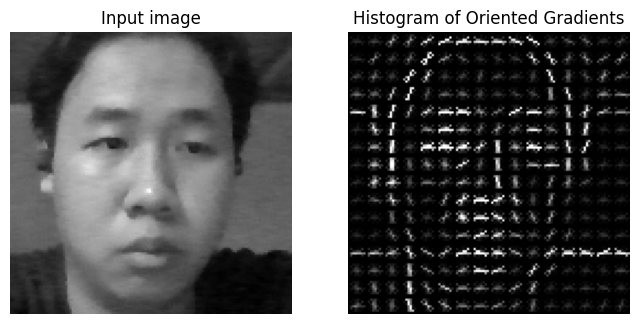

In [ ]:
from skimage import exposure

def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  print(size1, size2)
  return face1 if size1 > size2 else face2

fds = []
for i in range(10):
  height, width = image[i].shape[:2]
  minSize1 = (int(width // 2.6), int(height // 2.6))
  minSize2 = (int(width // 2), int(height // 2))
  face1 = face_cascade.detectMultiScale(image[i], scaleFactor=1.1, minNeighbors=6, minSize=minSize1)
  face2 = face_cascade.detectMultiScale(image[i], scaleFactor=1.1, minNeighbors=6, minSize=minSize2)

  print(face1, face2)

  faces = maxFace(face1, face2)

  # Vẽ hộp chứa khuôn mặt
  for (x, y, w, h) in faces:
      face_img = image[i][y:y + h, x:x + w]


  face_img_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
  face_img_gray = cv2.resize(face_img_gray, (128, 128))

  fd, hog_image = feature.hog(face_img_gray, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(4, 4), visualize=True, block_norm="L2")

  fds.append(fd)

  # display the image
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

  ax1.axis('off')
  ax1.imshow(face_img_gray, cmap=plt.cm.gray)
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  # display the HOG features
  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')

In [ ]:
for i in range (10):
    results = model.predict(fds[i].reshape(1, -1))
    if results == 0:
        print('Heart')
    elif results == 1:
        print('Oval')
    elif results == 2:
        print('Round')
    else:
        print('Square')

Round
Oval
Round
Round
Round
Round
Round
Round
Round
Round


##### Test ảnh mạng

In [ ]:
deploy_dir = r'C:\Users\Admin\Desktop\test'

In [ ]:
image_files = os.listdir(deploy_dir)

image = []
for image_file in image_files:
    image_path = os.path.join(deploy_dir, image_file)
    img = cv2.imread(image_path)
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    image.append(img)

In [ ]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Admin\\Documents\\CS231\\FaceShape Dataset\\haarcascade_frontalface_default.xml')

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Admin\AppData\Local\Temp\ipykernel_13868\2442759985.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face1 is not ():
C:\Users\Admin\AppData\Local\Temp\ipykernel_13868\2442759985.py:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if face2 is not ():


[[ 23  70 153 153]] [[ 21  69 157 157]]
10790 11968
[[ 35  37 123 123]] [[ 24  28 145 145]]
7568 14157
[[ 95 141 307 307]] [[ 91 137 316 316]]
35192 40275
[[ 35  68 134 134]] [[ 28  63 147 147]]
6534 9996
[[118  25 119 119]] ()
94 0
() ()
0 0


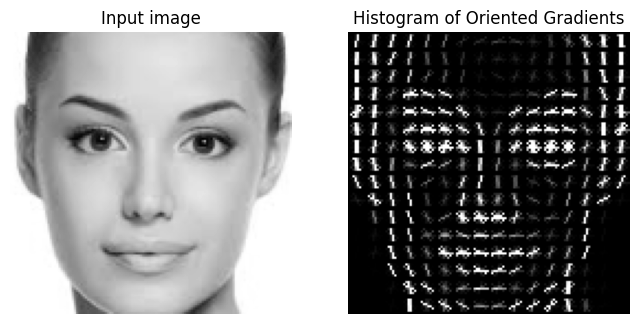

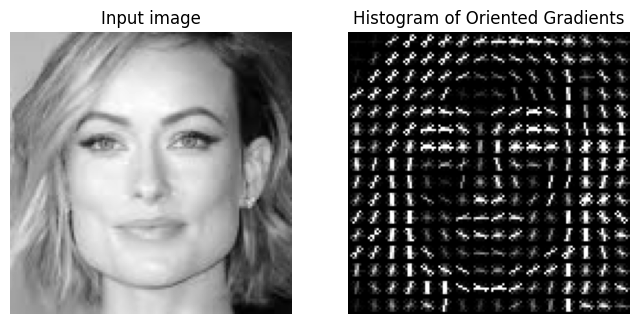

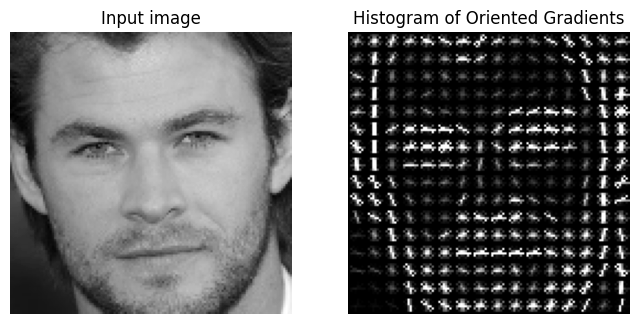

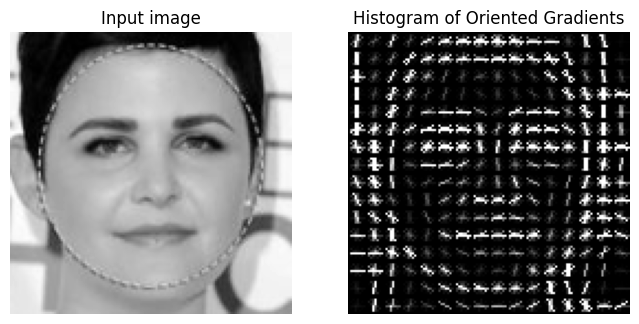

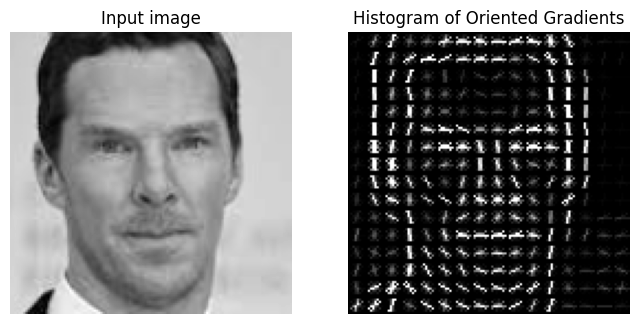

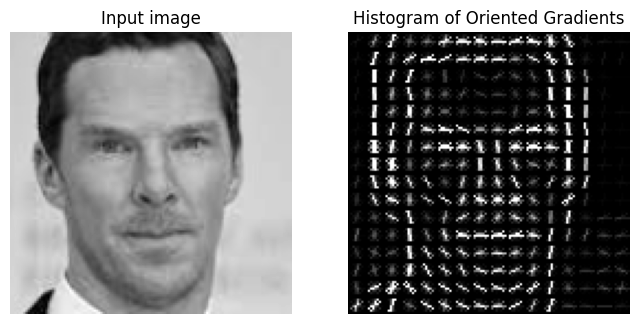

In [ ]:
from skimage import exposure

def maxFace(face1, face2):
  size1, size2 = 0, 0
  if face1 is not ():
    size1 = (face1[0][2] - face1[0][0])*(face1[0][3] - face1[0][1])
  if face2 is not ():
    size2 = (face2[0][2] - face2[0][0])*(face2[0][3] - face2[0][1])
  print(size1, size2)
  return face1 if size1 > size2 else face2

fds = []
for i in range(6):
  height, width = image[i].shape[:2]
  minSize1 = (int(width // 2.6), int(height // 2.6))
  minSize2 = (int(width // 2), int(height // 2))
  face1 = face_cascade.detectMultiScale(image[i], scaleFactor=1.1, minNeighbors=6, minSize=minSize1)
  face2 = face_cascade.detectMultiScale(image[i], scaleFactor=1.1, minNeighbors=6, minSize=minSize2)

  print(face1, face2)

  faces = maxFace(face1, face2)

  # Vẽ hộp chứa khuôn mặt
  for (x, y, w, h) in faces:
      face_img = image[i][y:y + h, x:x + w]


  face_img_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
  face_img_gray = cv2.resize(face_img_gray, (128, 128))

  fd, hog_image = feature.hog(face_img_gray, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(4, 4), visualize=True, block_norm="L2")

  fds.append(fd)

  # display the image
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

  ax1.axis('off')
  ax1.imshow(face_img_gray, cmap=plt.cm.gray)
  ax1.set_title('Input image')

  # Rescale histogram for better display
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  # display the HOG features
  ax2.axis('off')
  ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  ax2.set_title('Histogram of Oriented Gradients')

In [ ]:
for fd in fds:
    results = model.predict(fd.reshape(1, -1))
    if results == 0:
        print('Heart')
    elif results == 1:
        print('Oval')
    elif results == 2:
        print('Round')
    else:
        print('Square')

Square
Square
Square
Round
Heart
Heart
